# Практическое задание № 1 по курсу ОММ

## Вариант 22
### Выполнил студент 340 группы Горохов Егор

# 1. Постановка задачи

Используя схему бегущего счёта и итерационные методы решить задачу:


\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} - \frac{2u}{1+(1+u^2)^2} \cdot \frac{\partial u}{\partial x} = 0, \; -1\leq x\leq 0, \\
u(x, 0) = x^2+1, \\
u(0, t) = e^{-t}.
\end{cases}
\end{equation}

#  2. Анализ задачи
## Построение характеристик

Получим уравнение характеристик для поставленной задачи:
\begin{equation}
\frac{dt}{1} = - \frac{1+(1+u^2)^2}{2u} \cdot \frac{dx}{1}
\end{equation}

Отсюда

\begin{equation}
\int_{t_0}^t dt = - \int_{x_0}^x \frac{1+(1+u^2)^2}{2u}dx
\end{equation}

И, следовательно
\begin{equation}
t - t_0 =  - \frac{1+(1+u^2)^2}{2u}(x - x_0)
\end{equation}

Воспользуемся начальными и граничными условиями и получим семейство кривых:

   1) $t_0$ = 0:  $t = - \frac{1+(1+(x_0^2+1)^2)^2}{2(x_0^2+1)}(x - x_0)$
   
   2) $x_0$ = 0: $t = - \frac{1+(1+e^{-2t_0})^2}{2e^{-t_0}}x + t_0$
   

Теперь построим получившиеся характеристики

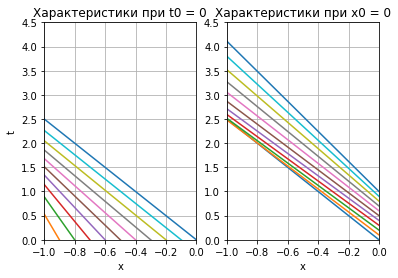

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# характеристика при t0 = 0, x0 взята с определенным шагом на промежутке [-1; 0].
def char1(x):
    return [(-(1. + (1. + (x0 ** 2 + 1.) ** 2) ** 2)/(2 * (x0 ** 2 + 1.))) * (x - x0) for x0 in np.arange(-1., 0.1, 0.1)]

# характеристика при x0 = 0, t0 взята с определенным шагом на промежутке [0; 1].
def char2(x):
    return [(-(1. + (1 + np.exp(-2. * t0)) ** 2)/(2 * np.exp(-t0))) * x + t0 for t0 in np.arange(0, 1.1, 0.1)]

# Так как x принадлежит [-1; 0], создадим соответствующий массив
x_arr = np.arange(-1, 0.1, 0.1)

# И передадим массив в функции, отвечающие за характеристики
char1_arr = [char1(x) for x in x_arr]
char2_arr = [char2(x) for x in x_arr]

plt.subplot(1, 2, 1)
plt.ylim(0,4.5)
plt.xlim(-1,0)
plt.plot(x_arr, char1_arr) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.ylim(0,4.5)
plt.xlim(-1,0)
plt.plot(x_arr, char2_arr)
plt.title('Характеристики при x0 = 0')
plt.xlabel('x')
plt.grid(True)
plt.show()

Можно заметить, что на интервале $x \in [-1; 0]$ характеристики явно не пересекаются на интервале $t \in [0; 1,5]$. В этой области мы и будем искать решение.

# 3. Решение при помощи численных методов
## Сетка

Введём в области $\Omega$ = {$(x, t): -1 \leq x \leq 0, 0 < t  \leq 1,5$} сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$:
\begin{equation}
\omega_{h,\tau} = 
    \begin{cases}
    x_n = n \cdot h, h = \frac{1}{N-1}, n = \overline{0, N-1}\\
    t_m = m \cdot \tau, \tau = \frac{1}{M-1}, m = \overline{0, M-1}
    \end{cases}
\end{equation}

На этой сетке мы будем рассматривать сеточную функцию $y_n^m = u(x_n, t_m)$

## Шаблон

Для начала приведём исходное уравнение к дивергентному виду $-$ выделим производную сложной функции:
\begin{equation}
-\frac{2u}{1+(1+u^2)^2}\frac{\partial u}{\partial x} = -\frac{\partial (arctg(1 + u^2))}{\partial x}
\end{equation}

Тогда уравнение придёт к виду
\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial (arctg(1 + u^2))}{\partial x} = 0
\end{equation}

Для данной задачи в рассматриваемой области будем использовать четырёхточечный шаблон.

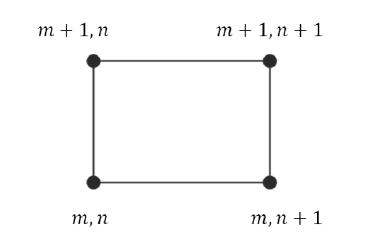

## Схема бегущего счёта

Для решения задачи будем использовать схему бегущего счёта. Схема, построенная на четырёхточечном шаблоне, безусловно устойчива и аппроксимирует уравнение с точностью $O(h^2 + \tau^2)$

Введём вспомогательную сеточную функцию $F_n^m = F(y_n^m) = arctg(1+(y_n^m)^2)$

Учтём дивергентный вид уравнения и составим разностную схему:
\begin{equation}
\frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h} = 0
\end{equation}

При этом начальное и граничное условия задачи примут вид:
\begin{equation}
\begin{cases}
y_n^0 = x_n^2 + 1,    n = \overline{0, N-1}\\
y_0^m = e^{-t_m},   m = \overline{0, M-1}
\end{cases}
\end{equation}

Окончательный вид разностной схемы таков:
\begin{equation}
\begin{cases}
F_n^m = F(y_n^m) = arctg(1+(y_n^m)^2)\\
\frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h} = 0\\
y_n^0 = x_n^2 + 1,    n = \overline{0, N-1}\\
y_0^m = e^{-t_m},   m = \overline{0, M-1}
\end{cases}
\end{equation}

Второе уравнение данной схемы есть ни что иное, как уравнение относительно $y_{n+1}^{m+1}$: $f(y_{n+1}^{m+1}) = 0$

Будем решать его итерационным методом Ньютона; запишем функцию, нуль которой необходимо найти, и её производную:
\begin{equation}
\begin{cases}
f(y_{n+1}^{m+1}) = \frac{y_n^{m+1} - y_n^m + y_{n+1}^{m+1} - y_{n+1}^m}{2\tau} - \frac{F_{n+1}^{m+1} - F_n^{m+1} + F_{n+1}^m - F_n^m}{2h}\\
f'(y_{n+1}^{m+1}) = \frac{1}{2\tau} - \frac{2y_{n+1}^{m+1}}{1+(1+(y_{n+1}^{m+1})^2)^2}\cdot\frac{1}{2h}
\end{cases}
\end{equation}

Суть метода Ньютона заключается в итерационной последовательности $y_{n+1}^{m+1^{(s+1)}} = y_{n+1}^{m+1^{(s)}} - \frac{f(y_{n+1}^{m+1^{(s)}})}{f'(y_{n+1}^{m+1^{(s)}})}$, которая продолжается до тех пор, пока не будет достигнута необходимая точность $\varepsilon$:
\begin{equation}
|y_{n+1}^{m+1^{(s+1)}} - y_{n+1}^{m+1^{(s)}}| \leq \varepsilon
\end{equation}

# 4. Исполняемый код

In [ ]:
epsilon = 0.00001 # точность
N, M = 100, 100 # размер сетки
X_start, T_start = 0, 0 # узел сетки с координатами (0, 0)
X_end, T_end = -1., 1.5 # узел сетки с координатами (N, M)

def F(m, n):
    return (np.arctan(1 + (y[m][n]) ** 2))

def der_f(m1, n1):
    return (1/(2. * ht)) - (y[m1][n1]/(hx * (1 + ((1 + (y[m1][n1] ** 2)) ** 2))))

def f(mp1, np1):
    n = np1-1
    m = mp1-1
    return (y[mp1][n]-y[m][n] + y[mp1][np1]-y[m][np1]) / (2.*ht) - (F(mp1, np1)-F(mp1,n) + F(m, np1)-F(m,n)) / (2.*hx)

                            
hx = (X_end - X_start)/(N-1)
ht = (T_end - T_start)/(M-1)

y = np.zeros((M, N))

for n in np.arange(N):
    y[0][n] = ((hx * n) ** 2 + 1)
for m in np.arange(M):
    y[m][0] = np.exp(-(ht * m))

# метод Ньютона
eps = epsilon + 1; # > epsilon
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            ep = f(m+1, n+1)/der_f(m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            if np.abs(ep) > eps:
                eps = abs(ep)

                

### Визуализируем решение

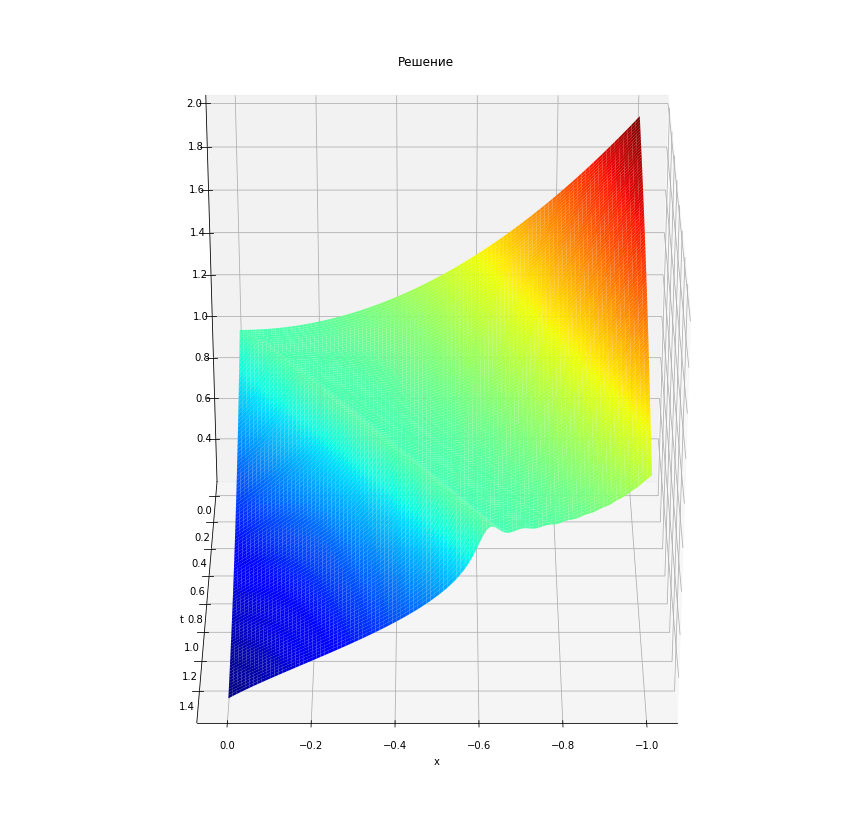

In [127]:
from mpl_toolkits.mplot3d import axes3d

xn = np.linspace(X_start, X_end, num = N)
tm = np.linspace(T_start, T_end, num = M)

X, T = np.meshgrid(xn, tm)

fig1 = plt.figure(figsize = (15, 15))
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(X, T, y, rstride = 1, cstride = 1, cmap = 'jet')
o1.view_init(30, 90)
plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# 5. Список литературы

1. Лекции А.Н. Боголюбова
2. Основы математического моделирования: основные понятия теории разностных схем, схемы бегущего счёта для линейных уравнений переноса, спектральный критерий устойчивости [http://math.phys.msu.ru/data/785/osnovnie_ponyatiya.pdf]
3. Н.Н. Калиткин "Численные методы"
4. Документация языка Python3, документация модуля Numpy.